<a href="https://colab.research.google.com/github/tinkuhore/house-price-prediction/blob/main/DS_Assignment_Shack_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Objective:

**Predict the price of a house**

**Problem statement:** 
The goal is to understand the relationship between house features and how these
variables affect the house price.
Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.

# **Import Basic Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

# **Data Ingestion**

In [6]:


data = pd.read_excel("/content/drive/MyDrive/Internshala Assignments/Shack labs/DS - Assignment Part 1 data set.xlsx")
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction date,414.0,2013.148953,0.281995,2012.666667,2012.916667,2013.166667,2013.416667,2013.583333
House Age,414.0,17.712560,11.392485,0.000000,9.025000,16.100000,28.150000,43.800000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.382840,289.324800,492.231300,1454.279000,6488.021000
Number of convenience stores,414.0,4.094203,2.945562,0.000000,1.000000,4.000000,6.000000,10.000000
latitude,414.0,24.969030,0.012410,24.932070,24.963000,24.971100,24.977455,25.014590
longitude,414.0,121.533361,0.015347,121.473530,121.528085,121.538630,121.543305,121.566270
Number of bedrooms,414.0,1.987923,0.818875,1.000000,1.000000,2.000000,3.000000,3.000000
House size (sqft),414.0,931.475845,348.910269,402.000000,548.000000,975.000000,1234.750000,1500.000000
House price of unit area,414.0,37.980193,13.606488,7.600000,27.700000,38.450000,46.600000,117.500000


Observations:


1.   All the features are numerical. So, no need to perform type casting or feature encoding.
2.   As the model need to predict the Price, so **House price of unit area** is our Target or Dependent Feature.
3.  As target feature cotain Continuous numerical values, so Our model should be a Regressor.



In [9]:
print("Total number of rows = ", data.shape[0])
print("Total No. of Features = ", data.shape[1])

Total number of rows =  414
Total No. of Features =  9


In [10]:
print("Unique values of each feature", end='\n')
for col in data.columns:
    print(col, data[col].unique(), sep='\n')
    print('\n', '-'*50, '\n')

Unique values of each feature
Transaction date
[2012.9166667 2013.5833333 2013.5       2012.8333333 2012.6666667
 2013.4166667 2013.0833333 2013.3333333 2013.25      2012.75
 2013.        2013.1666667]

 -------------------------------------------------- 

House Age
[32.  19.5 13.3  5.   7.1 34.5 20.3 31.7 17.9 34.8  6.3 13.  20.4 13.2
 35.7  0.  17.7 16.9  1.5  4.5 10.5 14.7 10.1 39.6 29.3  3.1 10.4 19.2
 25.9 29.6 37.9 16.5 15.4 13.9 12.  16.2 13.6 16.8 36.1 34.4  2.7 36.6
 21.7 35.9 24.2 29.4 31.3 32.1 16.1 33.6  3.5 30.3 11.   5.3 17.2  2.6
 17.5 40.1  1.   8.5 30.4 12.5  6.6 35.5 32.5 13.8  6.8 12.3 20.5 38.2
 18.  11.8 30.8 25.3 15.1  1.8  8.9 23.   9.1 20.6 31.9 40.9  8.   6.4
 28.4 16.4 12.7  1.1 32.7 12.2 31.4  4.   8.1 33.3  9.9 14.8 30.6 30.9
 16.6 31.5 38.6  3.8 41.3 38.5 26.6 33.4 18.9 11.4 10.  12.9  5.1 19.8
 11.9  2.1  3.2 34.9 35.8  4.9  6.5 30.7 11.6 15.5 16.  13.7 28.2 27.6
  8.4 24.   3.6  4.3 30.2 33.  13.1 14.  26.9 13.5 17.  14.1 20.9 16.3
 35.3 43.8  9.7 15.2 22

**Observations:**


1.   All the unique elements in all features other than **"Transaction Date"** are valid. there are no invalid or wrong inputs.
2.   In **"Transaction Date"** the inputs are invalid. we can either drop it or can extract the year and use it. I'm going with the 2nd approach.



In [11]:
# Modifying the "Transaction Date" feature

data["Transaction date"] = data["Transaction date"].apply(lambda x: int(str(x).split(".")[0]))
data["Transaction date"].unique()

array([2012, 2013])

In [12]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [13]:
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

**No Null values found.**

In [14]:
data.duplicated().sum()

0

**No Duplicated values found.**

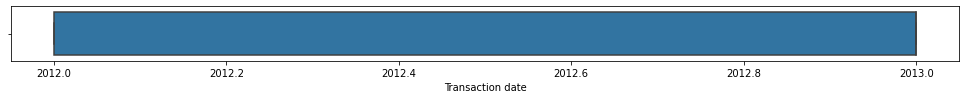

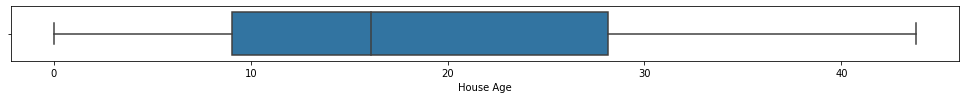

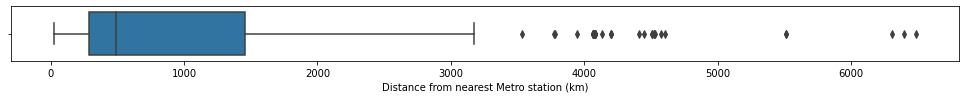

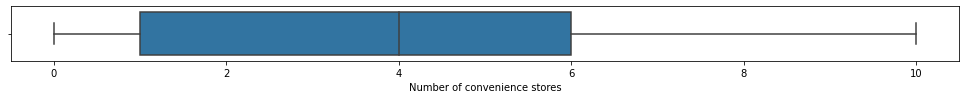

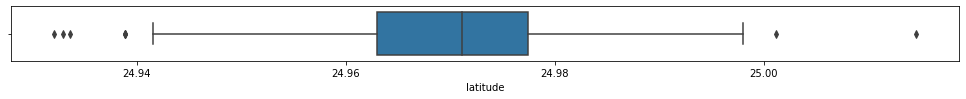

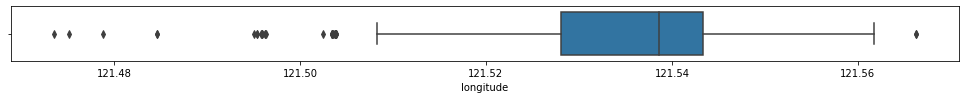

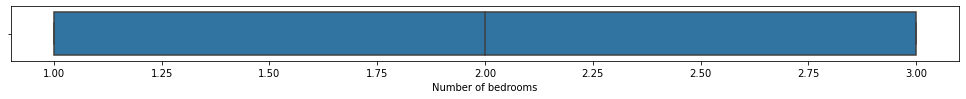

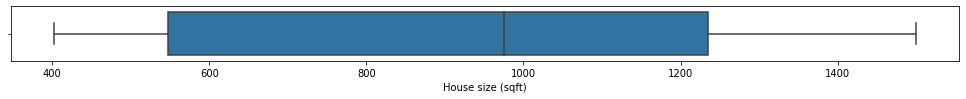

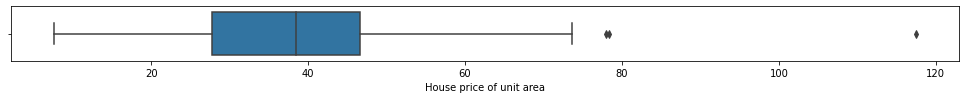

In [15]:
for col in data.columns:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=data, x=col)

 Observations:


1.  There are few outliers in the following features


> (a) Distance from nearest Metro station (km)


> (b) latitude


> (c) longitude






2.   Before Building our model we need to handle them.



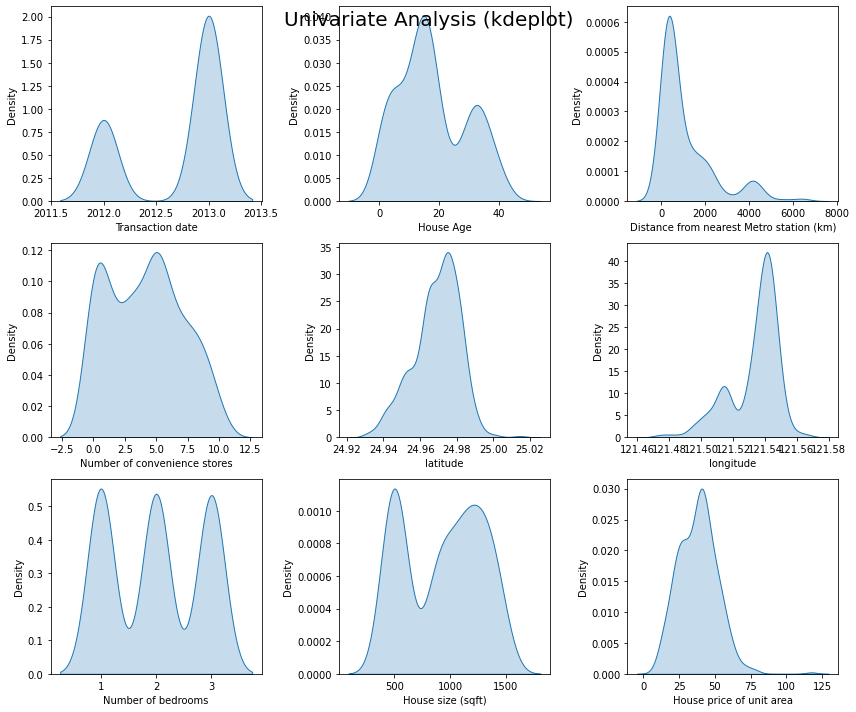

In [16]:
plt.figure(figsize=(12, 10))
plt.suptitle("Univariate Analysis (kdeplot)", fontsize=20, fontweight=10)
for i, col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    plt.xlabel(col)
    sns.kdeplot(x=data[col], shade=True)
    plt.tight_layout()

Observations:


1.   Need to perform Data Transformation as the data is not normally distributed for most of the features.



# **Bi-variate Analysis**

## Independent Features Vs Dependent Feature
**Graphical Analysis**

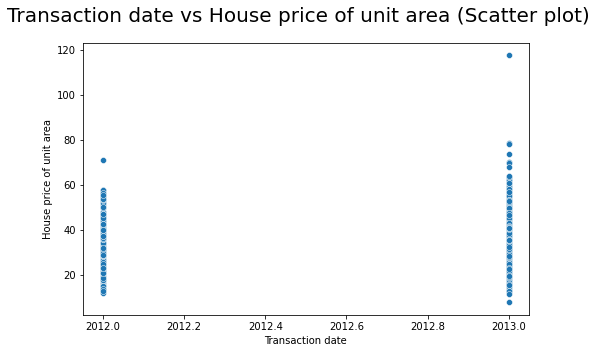

In [17]:
plt.figure(figsize=(8,5))
plt.suptitle("Transaction date vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["Transaction date"], y=data['House price of unit area'])

In one year **House price of unit area** has increased.


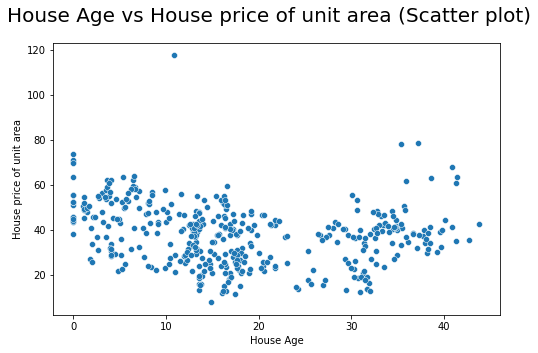

In [18]:
plt.figure(figsize=(8,5))
plt.suptitle("House Age vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["House Age"], y=data['House price of unit area'])

The relation between **House price of unit area** and **House Age** is random.

 When House Age is in between 0 to 20, the price decreases with increase in Age.

But when the House Age is in between 30 to 40, price has increased in few cases.

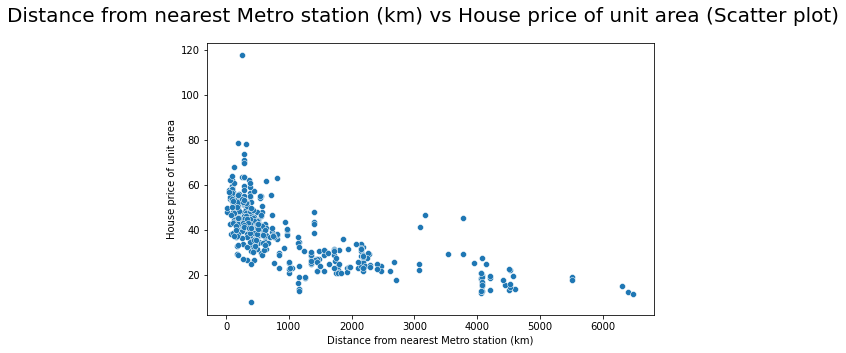

In [19]:
plt.figure(figsize=(8,5))
plt.suptitle("Distance from nearest Metro station (km) vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["Distance from nearest Metro station (km)"], y=data['House price of unit area'])

**Distance from nearest Metro station (km)** and **House price of unit area** are inversely proportional.

As distance increases the price decreases.

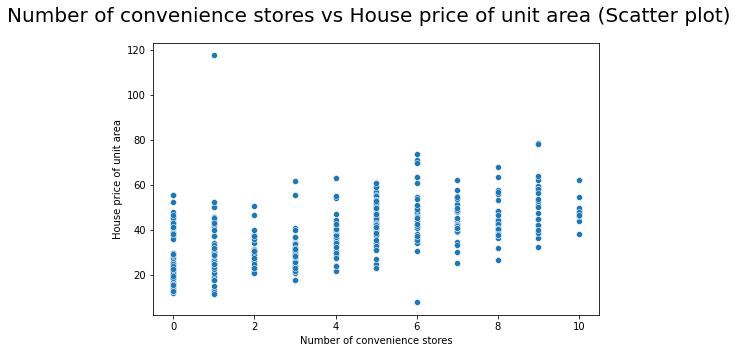

In [20]:
plt.figure(figsize=(8,5))
plt.suptitle("Number of convenience stores vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["Number of convenience stores"], y=data['House price of unit area'])

**Number of convenience stores** and **House price of unit area** are directly proportional.

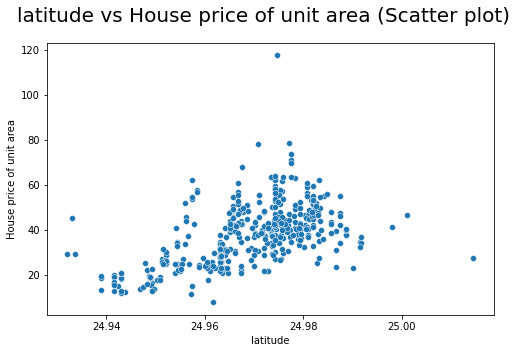

In [21]:
plt.figure(figsize=(8,5))
plt.suptitle("latitude vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["latitude"], y=data['House price of unit area'])

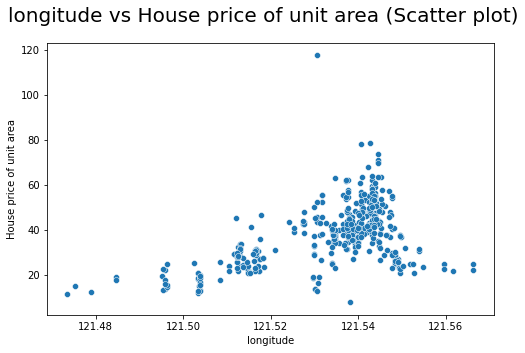

In [22]:
plt.figure(figsize=(8,5))
plt.suptitle("longitude vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["longitude"], y=data['House price of unit area'])

Observing the above two plots, it can be concluded that around a particular location (lattitude ~ 24.97 & longitude ~ 121.55) the **House price of unit area** reaches the maximum value.

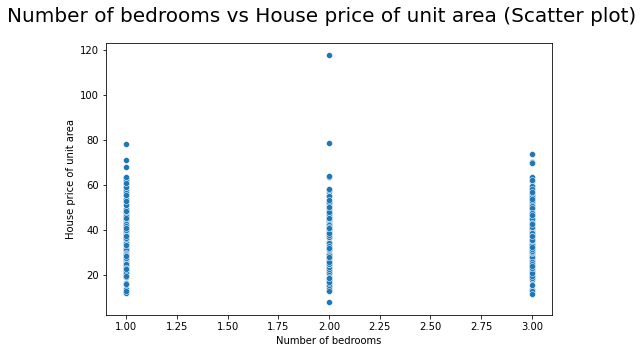

In [23]:
plt.figure(figsize=(8,5))
plt.suptitle("Number of bedrooms vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["Number of bedrooms"], y=data['House price of unit area'])

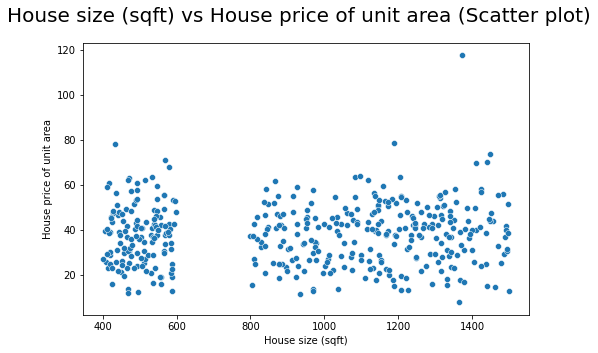

In [24]:
plt.figure(figsize=(8,5))
plt.suptitle("House size (sqft) vs House price of unit area (Scatter plot)", fontsize=20, fontweight=10)
sns.scatterplot(x=data["House size (sqft)"], y=data['House price of unit area'])

**House size (sqft)** and **House price of unit area** are Directly proportional.

And there is no such houses with **House size (sqft)** in between 600 to 800 sqft.

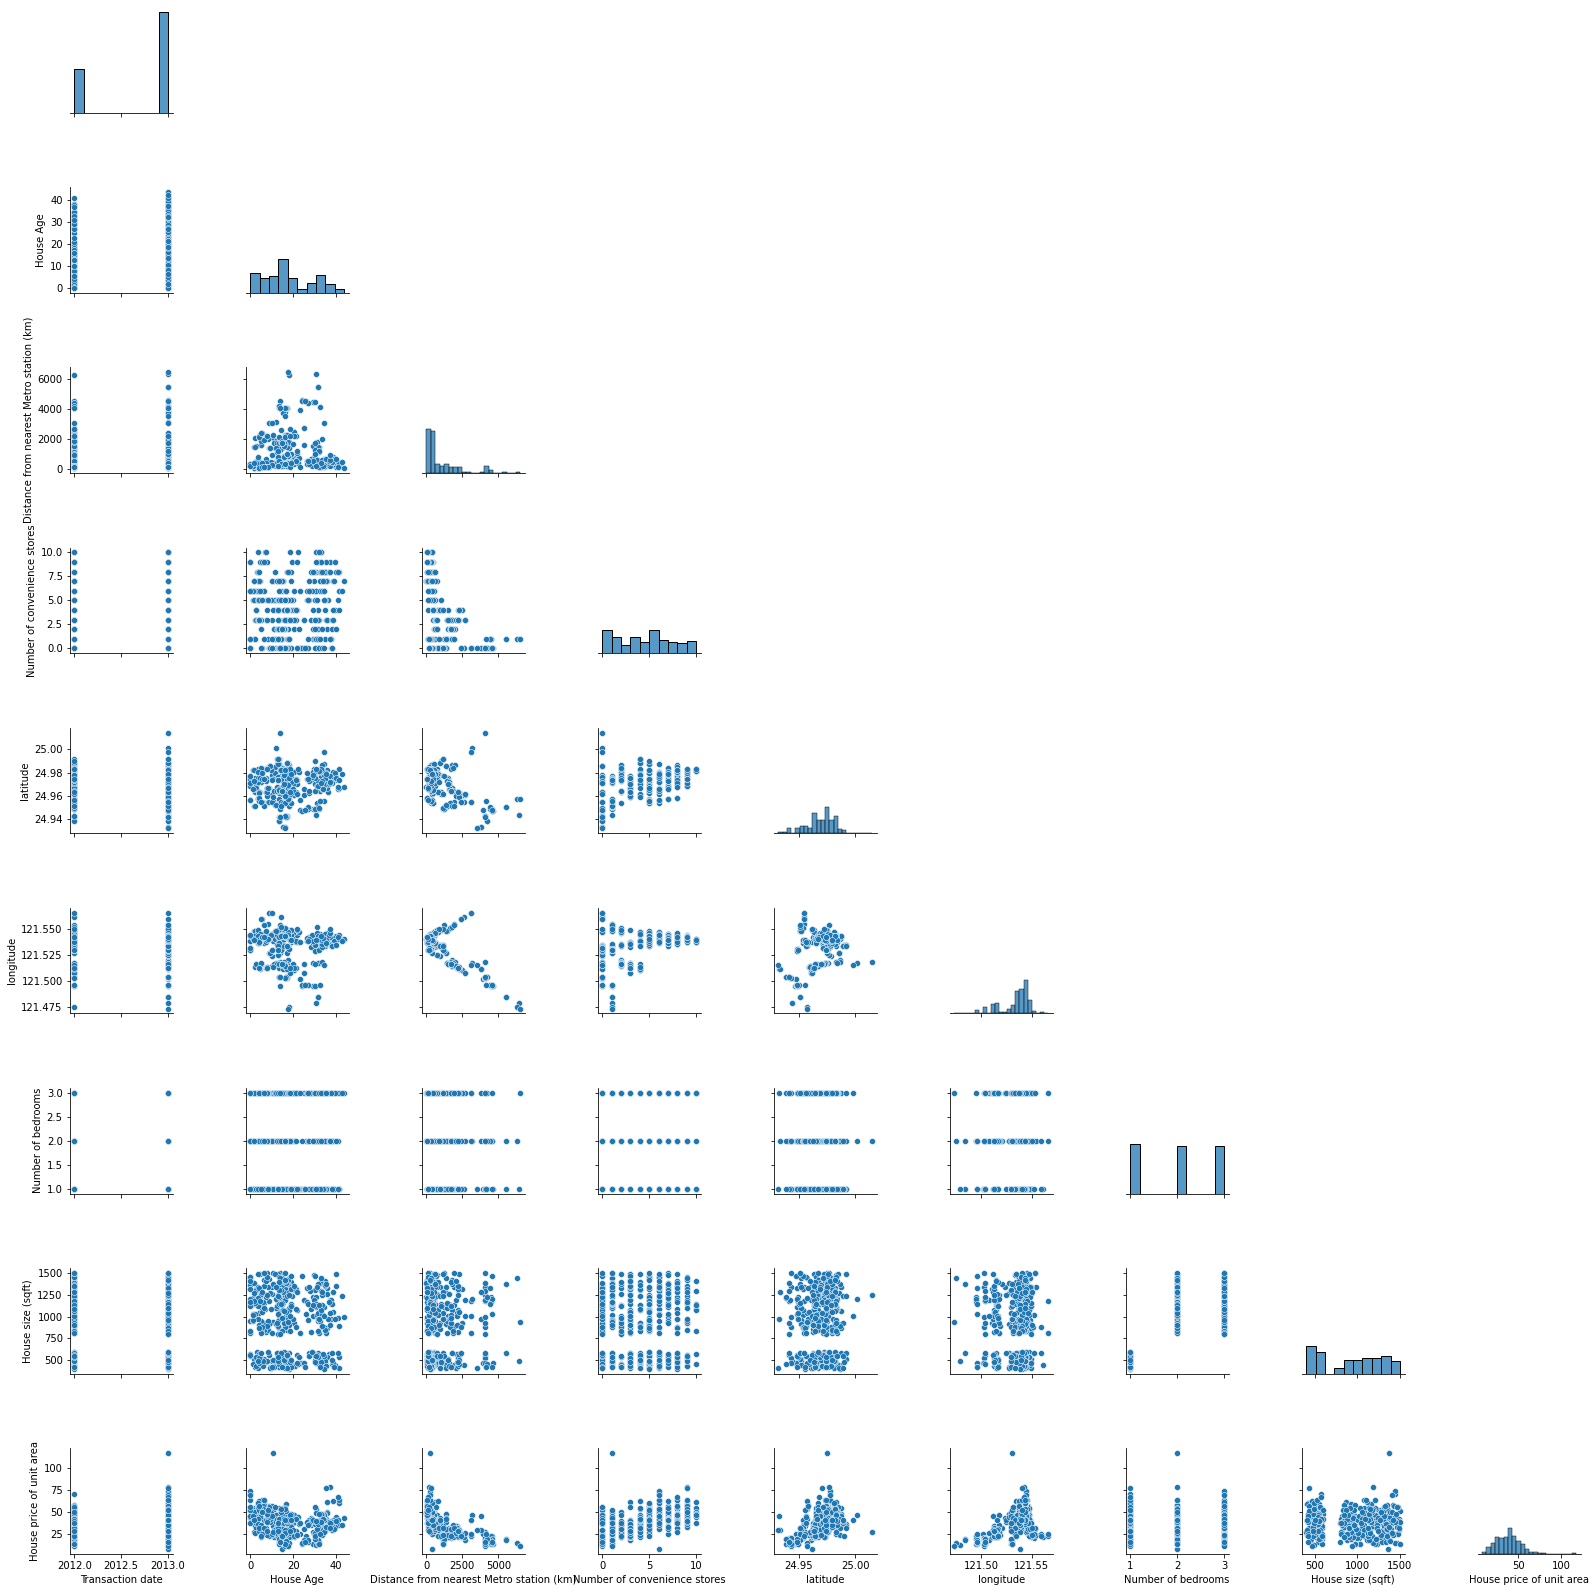

In [25]:
sns.pairplot(data, corner=True)

# **Checking Multicolinearity**

In [26]:
#plot color scaled correlation matrix
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.028743,0.025156,0.081545
House Age,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.028743,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.025156,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


**Corelation between features (heat map)**

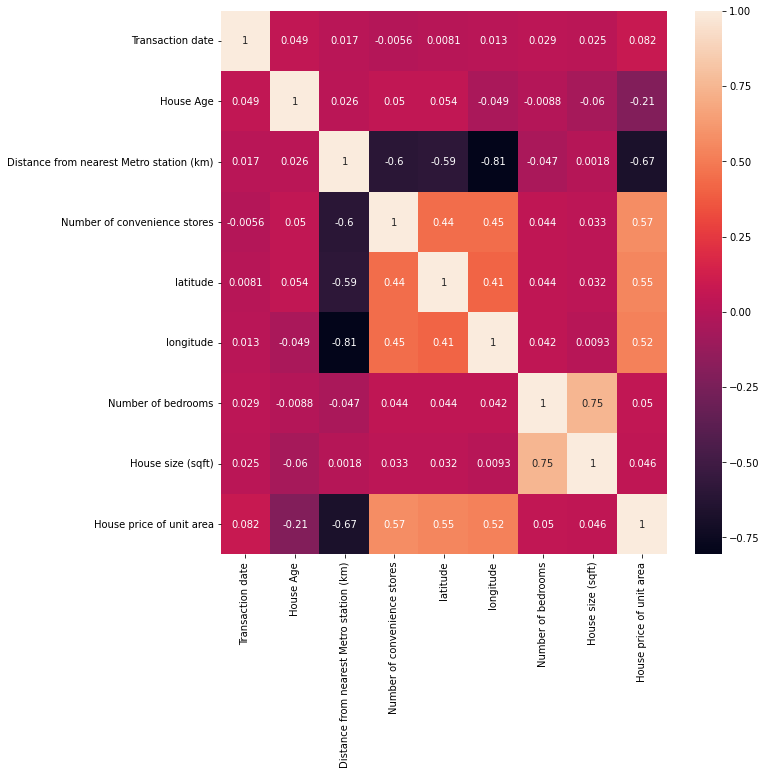

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [28]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = data.columns
vif["vif_score"] = [round(variance_inflation_factor(data.values, i), 2) for i in range(data.shape[1])]
vif

,features,vif_score
0,Transaction date,18386071.92
1,House Age,3.93
2,Distance from nearest Metro station (km),4.40
3,Number of convenience stores,5.17
4,latitude,6350929.94
5,longitude,23319310.75
6,Number of bedrooms,16.07
7,House size (sqft),19.04
8,House price of unit area,20.92


Observations:


1.   Depending on VIF score, it can be concluded that **Transaction date**, **latitude**, **longitude** has Multicolinearity.
2.   Multicolinearity can drop the accuracy of the model and can also lead to Overfitting problem.
3.  To avoid such conditions, those 3 features should be droped before training the model.



In [29]:
data.drop(columns=["Transaction date", "latitude"], inplace=True)

In [30]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,121.54024,1,575,37.9
1,19.5,306.59470,9,121.53951,2,1240,42.2
2,13.3,561.98450,5,121.54391,3,1060,47.3
3,13.3,561.98450,5,121.54391,2,875,54.8
4,5.0,390.56840,5,121.54245,1,491,43.1


## VIF score after droping "Transaction date", "latitude"

In [31]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif2 = pd.DataFrame()
vif2["features"] = data.columns
vif2["vif_score"] = [round(variance_inflation_factor(data.values, i), 2) for i in range(data.shape[1])]
vif2

,features,vif_score
0,House Age,3.80
1,Distance from nearest Metro station (km),3.71
2,Number of convenience stores,5.15
3,longitude,37.78
4,Number of bedrooms,16.07
5,House size (sqft),19.03
6,House price of unit area,19.23


## **VIF score after droping "longitude"**

In [32]:
data.drop(columns=["longitude"], inplace=True)

In [33]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1


In [34]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif3 = pd.DataFrame()
vif3["features"] = data.columns
vif3["vif_score"] = [round(variance_inflation_factor(data.values, i), 2) for i in range(data.shape[1])]
vif3

,features,vif_score
0,House Age,3.04
1,Distance from nearest Metro station (km),2.12
2,Number of convenience stores,5.10
3,Number of bedrooms,15.84
4,House size (sqft),18.43
5,House price of unit area,8.55


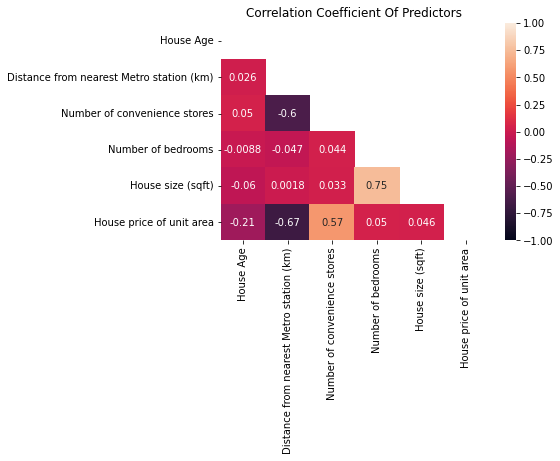

In [35]:
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# generate heatmap
sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Oservations:

1. **Number of bedrooms** and **House size (sqft)** both are highly corelated. It will be better to drop any one of them. I'll continue with **House size (sqft)**.

## Drop Number of bedrooms and Check Final VIF Score

In [36]:
data.drop(columns=["Number of bedrooms"], inplace=True)

In [37]:
data.head(3)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),House price of unit area
0,32.0,84.87882,10,575,37.9
1,19.5,306.59470,9,1240,42.2
2,13.3,561.98450,5,1060,47.3


In [38]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif4 = pd.DataFrame()
vif4["features"] = data.columns
vif4["vif_score"] = [round(variance_inflation_factor(data.values, i), 2) for i in range(data.shape[1])]
vif4

,features,vif_score
0,House Age,3.00
1,Distance from nearest Metro station (km),2.12
2,Number of convenience stores,5.10
3,House size (sqft),6.84
4,House price of unit area,8.44


# **Outlier Handle**

In [39]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 7.1 MB/s 


In [40]:
from feature_engine.outliers.winsorizer import Winsorizer

In [41]:
capper = Winsorizer(capping_method='quantiles', tail='both', fold=0.10,
                    add_indicators=False, variables=None, missing_values='raise')

In [42]:
# data = capper.fit_transform(X=data)

### **Verify Outliers after handleing it**

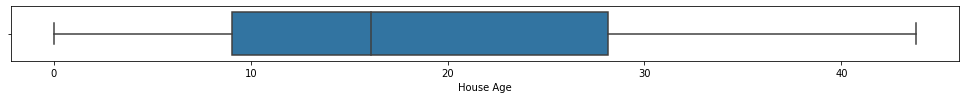

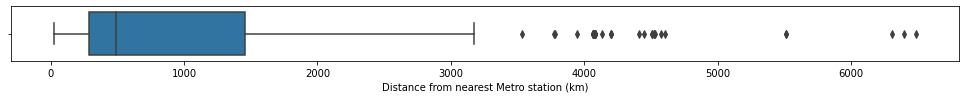

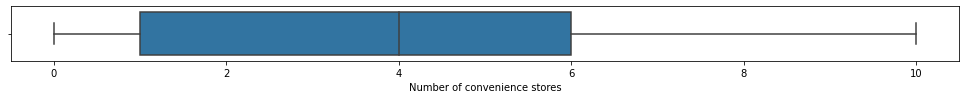

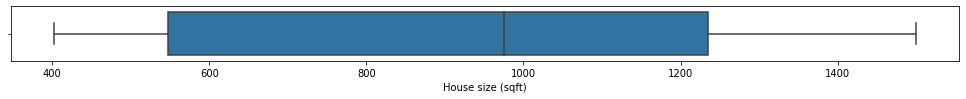

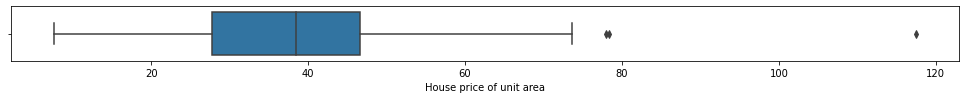

In [43]:
for col in data:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=data, x=col)

In [44]:
data.shape

(414, 5)

**All Outliers Handled successfuly without droping any rows.**

# **Seperating Independent and Dependent Features**

In [45]:
X = data.drop(["House price of unit area"], axis=1)
y = data["House price of unit area"]

In [46]:
X.head(3)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft)
0,32.0,84.87882,10,575
1,19.5,306.59470,9,1240
2,13.3,561.98450,5,1060


In [47]:
y.head(3)

0    37.9
1    42.2
2    47.3
Name: House price of unit area, dtype: float64

# **Seperating Training and Test Data**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# **Train Data Distribution**

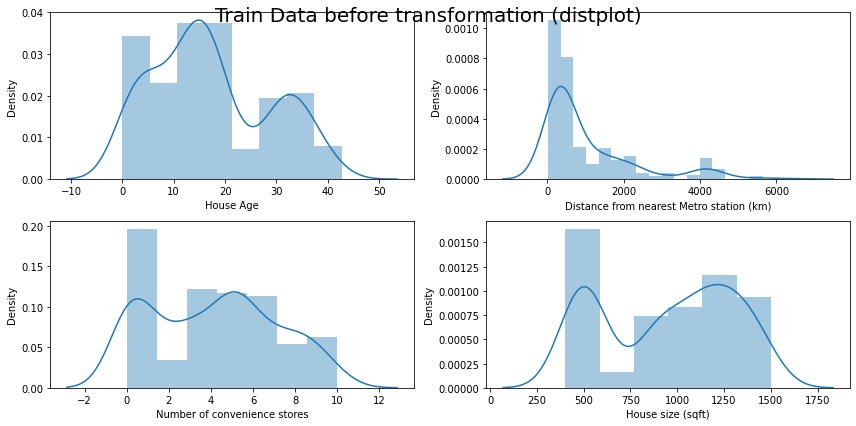

In [49]:
plt.figure(figsize=(12, 6))
plt.suptitle("Train Data before transformation (distplot)", fontsize=20, fontweight=10)
for i, col in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.xlabel(X.columns[i])
    sns.distplot(x=X_train[col])
    plt.tight_layout()

**Features are not Normally Distributed.**

**Need to perform Data Transformation.**

# **Data Transformation**

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.fit_transform(X_test)

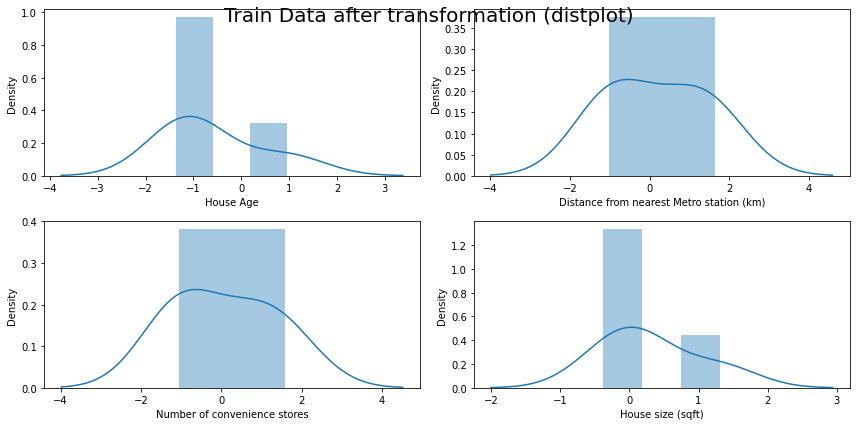

In [51]:
plt.figure(figsize=(12, 6))
plt.suptitle("Train Data after transformation (distplot)", fontsize=20, fontweight=10)
for i, col in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.xlabel(X.columns[i])
    sns.distplot(x=X_train_tf[i])
    plt.tight_layout()

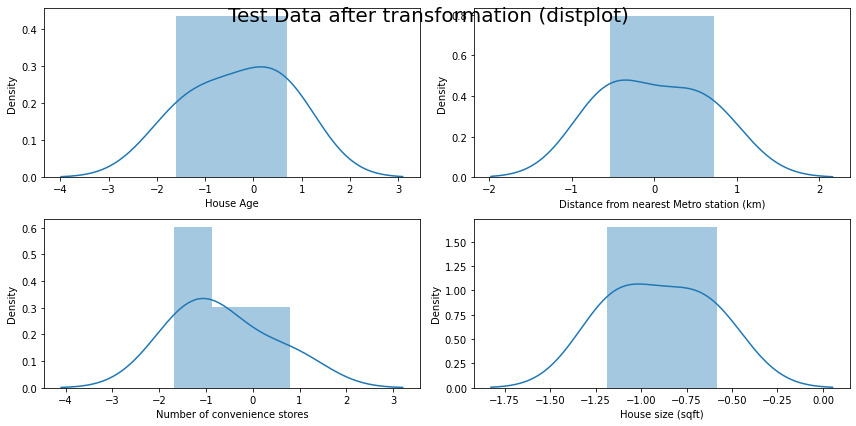

In [52]:
plt.figure(figsize=(12, 6))
plt.suptitle("Test Data after transformation (distplot)", fontsize=20, fontweight=10)
for i, col in enumerate(X.columns):
    plt.subplot(2,2,i+1)
    plt.xlabel(X.columns[i])
    sns.distplot(x=X_test_tf[i])
    plt.tight_layout()

# **Importing Regressor model libraries**

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [54]:
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
e_net = ElasticNet()
svr = SVR()
dt_reg = DecisionTreeRegressor()
bag_reg = BaggingRegressor()
extree_reg = ExtraTreesRegressor()
randf_reg = RandomForestRegressor()
adb_reg = AdaBoostRegressor()

In [55]:
# list of models

models = {"LR": lin_reg, 
          "Ridge": ridge, 
          "Lasso":lasso, 
          "EN": e_net, 
          "SVR": svr, 
          "DT":dt_reg, 
          "Bagging":bag_reg, 
          "ExtraTree":extree_reg,
          "RandomForest":randf_reg,
          "Adaboost":adb_reg}

In [56]:
models[list(models.keys())[0]]

LinearRegression()

# **Model Training**

In [57]:
for i,j in models.items():
  print(j.fit(X_train, y_train))

LinearRegression()
Ridge()
Lasso()
ElasticNet()
SVR()
DecisionTreeRegressor()
BaggingRegressor()
ExtraTreesRegressor()
RandomForestRegressor()
AdaBoostRegressor()


# **Performance comparision of Models**

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
def adj_r2(R2):
    return 1 - ((1 - R2)*((len(X_test_tf) - 1)/(len(X_test_tf) - len(X.columns) - 1)))

In [59]:
accuracy_matrix = pd.DataFrame(columns=["Model name", "MAE Score", "RMSE Score", "R2 Score"])
for i,j in models.items():
  pred = j.predict(X_test)
  accuracy_matrix.loc[len(accuracy_matrix.index)] = [i, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred)), r2_score(y_test, pred)]

accuracy_matrix["Adjusted R2 Score"] = accuracy_matrix["R2 Score"].apply(adj_r2)
accuracy_matrix.sort_values(by=['R2 Score'], ascending=False)

,Model name,MAE Score,RMSE Score,R2 Score,Adjusted R2 Score
7,ExtraTree,4.670663,6.726105,0.714785,0.703261
8,RandomForest,4.831567,6.923747,0.697777,0.685565
6,Bagging,5.068942,7.358328,0.658647,0.644855
9,Adaboost,6.005876,7.940120,0.602534,0.586475
5,DT,5.980769,8.516421,0.542743,0.524268
4,SVR,6.316543,8.640540,0.529318,0.510301
0,LR,6.264922,8.665502,0.526594,0.507467
1,Ridge,6.264934,8.665573,0.526587,0.507459
3,EN,6.276844,8.695313,0.523332,0.504072
2,Lasso,6.281174,8.695675,0.523292,0.504031


In [60]:
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':100})


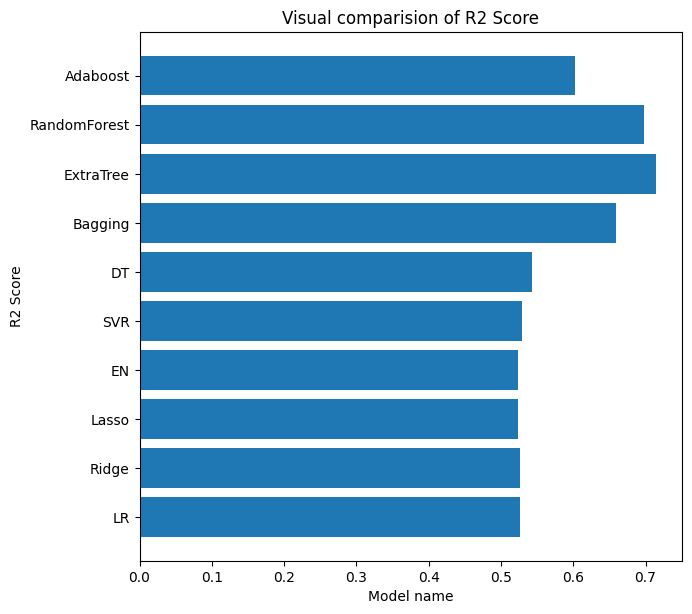

In [61]:
# visual comparision of performance score
plt.barh(accuracy_matrix["Model name"], accuracy_matrix["R2 Score"])
plt.xlabel("Model name")
plt.ylabel("R2 Score")
plt.title('Visual comparision of R2 Score')
plt.show()

# **Graphical Comparision of Actual and Predicted "House Price"**

Models with default Hyperparameters

In [62]:
predicted = {"Actual":y_test}
for i,j in models.items():
  predicted[i] = j.predict(X_test)

In [63]:
pred_df = pd.DataFrame(predicted)
pred_df.head(3)

,Actual,LR,Ridge,Lasso,EN,SVR,DT,Bagging,ExtraTree,RandomForest,Adaboost
358,45.1,50.000086,49.999389,49.727291,49.769864,45.214162,54.4,52.66,53.910,52.196,52.414286
350,42.3,44.464569,44.464531,44.432695,44.443287,41.770321,39.3,40.73,37.712,39.046,39.117500
373,52.2,43.925141,43.928024,44.538182,44.610812,44.348041,43.5,47.55,46.406,49.105,48.090909


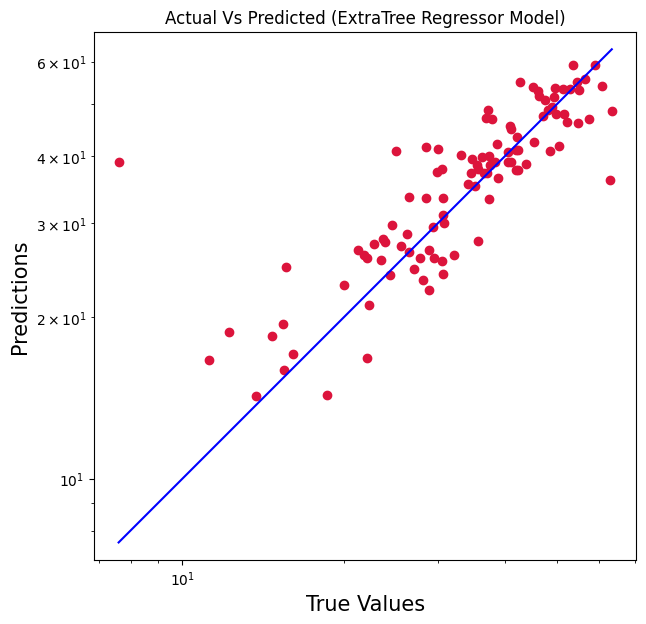

In [64]:
plt.figure(figsize=(7,7))
plt.scatter(pred_df["Actual"], pred_df["ExtraTree"], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_df["ExtraTree"]), max(pred_df["Actual"]))
p2 = min(min(pred_df["ExtraTree"]), min(pred_df["Actual"]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Actual Vs Predicted (ExtraTree Regressor Model)")
plt.show()

# **Conclusion (Based on Models with  default hyperparameters)**

Based on **"R2 Score"** it can be concluded that **ExtraTree Regressor** with default parameter is the best model to predict the "House Price".

# **Hyper Parameter Tuning**

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [66]:
def params_converter(d:dict):
  '''dictionary to touple'''
  for i,j in d.items():
    print(f"{i}={j}")

In [67]:
# SVR

params = {'kernel':('linear', 'rbf'), 'C':[1, 30, 50, 70, 100, 120, 140, 150]}
svr_grid = GridSearchCV(svr, params, cv=3, verbose=2, n_jobs=-1)
svr_grid.fit(X_train_tf, y_train)
svr_grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'C': 30, 'kernel': 'rbf'}

In [68]:
params_converter(svr_grid.best_params_)

C=30
kernel=rbf


In [69]:
# DT
grid_param = {
    'criterion' : ["squared_error", "absolute_error"],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best', 'random']
    }

dt_reg_grid = GridSearchCV(estimator=dt_reg, param_grid=grid_param, cv=3, verbose=2, n_jobs=-1)
dt_reg_grid.fit(X_train, y_train)
params_converter(dt_reg_grid.best_params_)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits
criterion=absolute_error
max_depth=3
min_samples_leaf=9
min_samples_split=2
splitter=best


In [70]:
# Bagging Reg
grid_param = {
    "base_estimator" : [LinearRegression(), SVR(), DecisionTreeRegressor()],
    'n_estimators' : range(0,150,10),
    'bootstrap' : [True, False],
    'max_samples' : range(1,10000,500)
    }

bag_reg_grid = GridSearchCV(estimator=bag_reg, param_grid=grid_param, cv=3, n_jobs=-1)
bag_reg_grid.fit(X_train, y_train)
params_converter(bag_reg_grid.best_params_)

base_estimator=DecisionTreeRegressor()
bootstrap=False
max_samples=1
n_estimators=120


In [71]:
# Extra tree
grid_param = {
    'criterion' : ["squared_error", "absolute_error"],
    'n_estimators' : range(30,150,20),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features': ["sqrt", "log2"]
    }

extree_reg_grid = RandomizedSearchCV(estimator=extree_reg, param_distributions=grid_param, n_iter=1000, cv=3, n_jobs=-1, verbose=2)
extree_reg_grid.fit(X_train, y_train)
print(extree_reg_grid.best_params_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
{'n_estimators': 70, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'absolute_error'}


In [72]:
params_converter(d=extree_reg_grid.best_params_)

n_estimators=70
min_samples_split=3
min_samples_leaf=1
max_features=sqrt
max_depth=10
criterion=absolute_error


In [73]:
# Random Forest
grid_param = {
    'criterion' : ["squared_error", "absolute_error"],
    'n_estimators' : range(0,150,10),
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'bootstrap' : [True, False],
    'max_samples' : range(1,10000,500),
    'max_features': ["sqrt", "log2"]
    }

randf_reg_grid = RandomizedSearchCV(estimator=randf_reg, param_distributions=grid_param, n_iter=1000, cv=3, n_jobs=-1, verbose=2)
randf_reg_grid.fit(X_train, y_train)
randf_reg_grid.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


{'n_estimators': 80,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_samples': 1,
 'max_features': 'sqrt',
 'max_depth': 31,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [74]:
params_converter(randf_reg_grid.best_params_)

n_estimators=80
min_samples_split=9
min_samples_leaf=7
max_samples=1
max_features=sqrt
max_depth=31
criterion=absolute_error
bootstrap=True


In [75]:
# AdaBoost
grid_param = {
    'n_estimators' : range(0,150,10),
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'loss': ["linear", "square"]
    }

adb_reg_grid = GridSearchCV(estimator=adb_reg, param_grid=grid_param, cv=3, n_jobs=-1, verbose=2)
adb_reg_grid.fit(X_train, y_train)
adb_reg_grid.best_params_

Fitting 3 folds for each of 120 candidates, totalling 360 fits


{'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 60}

In [76]:
params_converter(adb_reg_grid.best_params_)

learning_rate=0.1
loss=square
n_estimators=60


# **Models with Best Hyperparameters**

In [77]:
best_svr = SVR(kernel='rbf', C=30)  #{'C': 30, 'kernel': 'rbf'}
best_dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=12, min_samples_leaf=5, min_samples_split=3, splitter='random')  
best_bag_reg = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=100,bootstrap=False,max_samples=1)
best_extree_reg = ExtraTreesRegressor(n_estimators=130,min_samples_split=7,min_samples_leaf=1,max_features='log2',max_depth=10,criterion='absolute_error')
best_randf_reg = RandomForestRegressor(n_estimators=120,min_samples_split=6,min_samples_leaf=8,max_samples=1,max_features='sqrt', max_depth=23, criterion='squared_error', bootstrap=True)
best_adb_reg = AdaBoostRegressor(learning_rate=0.1, loss='linear', n_estimators=50)

In [78]:
# list of best models

best_models = { 
          "Best SVR": best_svr, 
          "Best DT":best_dt_reg, 
          "Best Bagging":best_bag_reg, 
          "Best ExtraTree":best_extree_reg,
          "Best RandomForest":best_randf_reg,
          "Best Adaboost":best_adb_reg
          }

# **Training of Best Models**

In [79]:
for i,j in best_models.items():
  print(j.fit(X_train, y_train))

SVR(C=30)
DecisionTreeRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=3,
                      splitter='random')
BaggingRegressor(base_estimator=LinearRegression(), bootstrap=False,
                 max_samples=1, n_estimators=100)
ExtraTreesRegressor(criterion='absolute_error', max_depth=10,
                    max_features='log2', min_samples_split=7, n_estimators=130)
RandomForestRegressor(max_depth=23, max_features='sqrt', max_samples=1,
                      min_samples_leaf=8, min_samples_split=6,
                      n_estimators=120)
AdaBoostRegressor(learning_rate=0.1)


# **Performance comparision of Best Models**

In [82]:
best_model_performance = pd.DataFrame(columns=["Model name", "MAE Score", "RMSE Score", "R2 Score"])
for i,j in best_models.items():
  pred = j.predict(X_test)
  best_model_performance.loc[len(best_model_performance.index)] = [i, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred)), r2_score(y_test, pred)]

best_model_performance["Adjusted R2 Score"] = best_model_performance["R2 Score"].apply(adj_r2)
best_model_performance.sort_values(by=["R2 Score"], ascending=False)

,Model name,MAE Score,RMSE Score,R2 Score,Adjusted R2 Score
3,Best ExtraTree,4.391967,6.847078,0.704433,0.692491
5,Best Adaboost,5.084783,7.187861,0.674279,0.661119
1,Best DT,5.185968,7.308631,0.663242,0.649636
0,Best SVR,5.962217,8.332439,0.562286,0.544601
4,Best RandomForest,10.849135,13.112739,-0.084008,-0.127807
2,Best Bagging,11.142538,13.486425,-0.146673,-0.193003


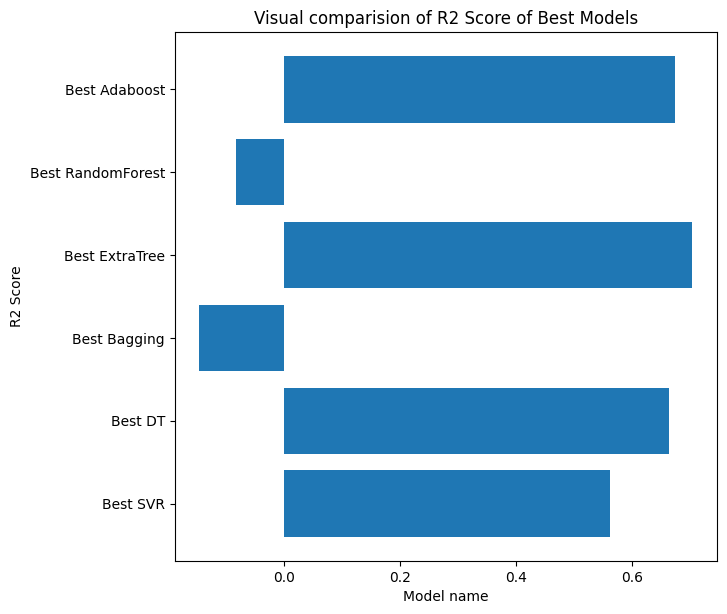

In [83]:
# visual comparision of performance score
plt.barh(best_model_performance["Model name"], best_model_performance["R2 Score"])
plt.xlabel("Model name")
plt.ylabel("R2 Score")
plt.title('Visual comparision of R2 Score of Best Models')
plt.show()

# **Graphical Comparision of Actual and Predicted "House Price"**

Models with best Hyperparameters

In [84]:
best_predicted = {"Actual":y_test}
for i,j in best_models.items():
  best_predicted[i] = j.predict(X_test)


In [85]:
best_pred_df = pd.DataFrame(best_predicted)
best_pred_df.head(3)

,Actual,Best SVR,Best DT,Best Bagging,Best ExtraTree,Best RandomForest,Best Adaboost
358,45.1,47.658351,48.133333,40.508,50.297692,39.335,51.007059
350,42.3,41.344400,38.872727,40.508,41.613077,39.335,40.345161
373,52.2,46.257134,37.057143,40.508,46.805769,39.335,51.526882


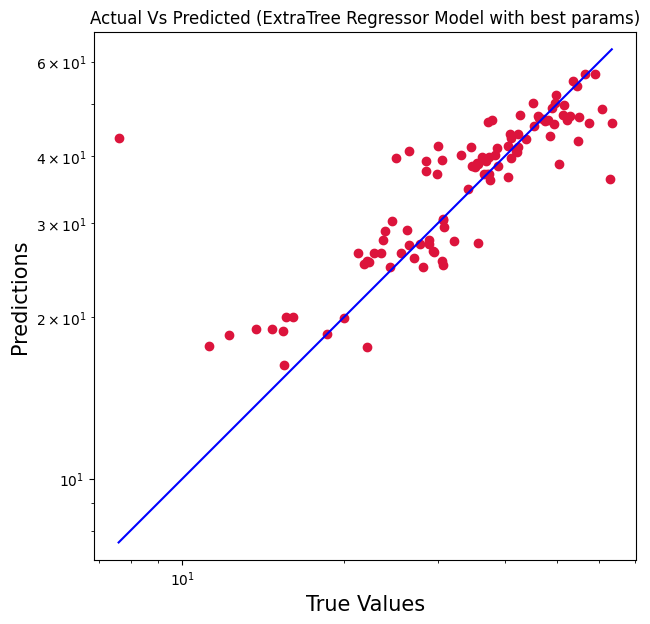

In [86]:
plt.figure(figsize=(7,7))
plt.scatter(best_pred_df["Actual"], best_pred_df["Best ExtraTree"], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(best_pred_df["Best ExtraTree"]), max(best_pred_df["Actual"]))
p2 = min(min(best_pred_df["Best ExtraTree"]), min(best_pred_df["Actual"]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Actual Vs Predicted (ExtraTree Regressor Model with best params)")
plt.show()

# **Conclusion (Based on Models with  best hyperparameters)**

Based on **"R2 Score"** it can be concluded that **ExtraTree Regressor** with best parameter is a good model to predict the "House Price".

There is no increase in performance after Hyperparameter tuning.



# **Final Model**
**ExtraTree Regressor with default parameter is the Best model**